In [15]:
# turn on plotting
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import num2date
import matplotlib.dates as mdates
#utilities for interacting with the OS
import os

import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [16]:
"""
pyart.retrieve.quasi_vertical_profile
=====================================

Retrieval of QVPs from a radar object

.. autosummary::
    :
    :
    
    quasi_vertical_profile
"""

import numpy as np

from pyart.io import read
from pyart.core import antenna_to_cartesian



def quasi_vertical_profile(filename, fields=None, gatefilter=None):
    
    """
    Quasi Vertical Profile.
    
    Creates a QVP object ....
    
    
    Parameters
    ----------
    radar : Radar
        Radar object used.
    field : string
        Radar field to use for QVP calculation.
    
    Other Parameters
    ----------------
    gatefilter : GateFilter
        A GateFilter indicating radar gates that should be excluded
        from the import qvp calculation
        
    Returns
    -------
    qvp : 
    
    
    References
    ----------
    Troemel, S., M. Kumjian, A. Ryzhkov, and C. Simmer, 2013: Backscatter 
    differential phase – estimation and variability. J. Appl. Meteor. Clim.. 
    52, 2529 – 2548.

    Troemel, S., A. Ryzhkov, P. Zhang, and C. Simmer, 2014: Investigations 
    of backscatter differential phase in the melting layer. J. Appl. Meteorol. 
    Clim. 53, 2344 – 2359.

    Ryzhkov, A., P. Zhang, H. Reeves, M. Kumjian, T. Tschallener, S. Troemel, 
    C. Simmer, 2015: Quasi-vertical profiles – a new way to look at polarimetric 
    radar data. Submitted to J. Atmos. Oceanic Technol.
    
    """

    radar = read(filename)
    
    if fields is None:
        fields = radar.fields
        
    #if gatefilter is not None:
        
    desired_angle = 20.0
    index = abs(radar.fixed_angle['data'] - desired_angle).argmin()
    print(radar.fixed_angle['data'])
    print(radar.elevation['data'][-1])
    
    qvp = {}
    
    for field in fields:
        this_field = radar.get_field(index, field).mean(axis = 0)
        qvp.update({field:this_field})
    
    qvp.update({'range': radar.range['data'], 'time': radar.time})
    x,y,z = antenna_to_cartesian(qvp['range']/1000.0, 0.0, 
                                 radar.fixed_angle['data'][index])
    qvp.update({'height': z})
    return qvp

In [7]:
#radar = pyart.io.read("/home/jhemedinger/dev_pyart/pyart_examples/XSW170519052004.RAW54YX")

In [8]:
#qvp = quasi_vertical_profile(radar)

[ 0.49987793  1.4996338   2.4993896   3.4991455   4.4989014   5.498657
  6.498413    7.498169    8.497925    9.497681   10.497437   11.502686
 12.502441   14.002075   15.001831   17.001343   20.00061    24.99939
 29.998169   40.00122    49.99878    54.99756    60.00183   ]
59.941402


Text(0, 0.5, 'Height Above Ground (km)')

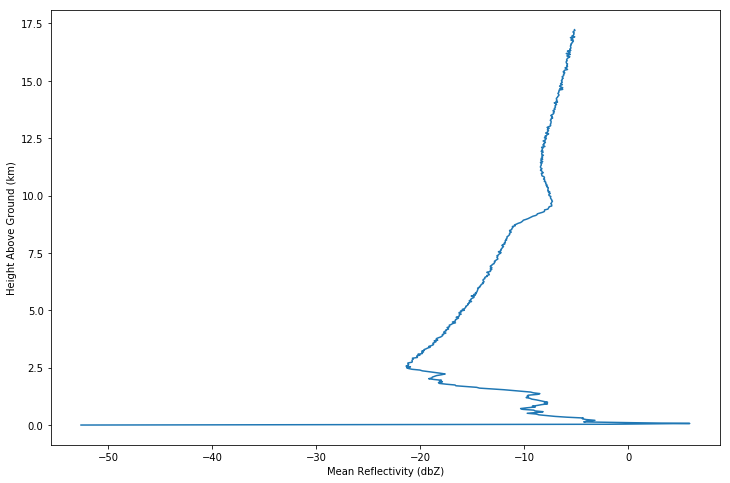

In [9]:
fig = plt.figure(figsize=(12,8))
plt.plot(qvp['reflectivity'], qvp['height']/1000.0)
plt.xlabel('Mean Reflectivity (dbZ)')
plt.ylabel('Height Above Ground (km)')